## 1.0 Import the necessery libraries

In [1]:
# Code task 1#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## 2.0 Import the datasets

### 2.1 Import the dataset longins

In [2]:
# Code task 2#
# Load the JSON file
file_path = "C:/Users/wgerm/OneDrive/Documents/GitHub/Ultimate_Technology/ultimate_challenge/ultimate_data_challenge.json"

with open(file_path, "r") as f:
   data1 = json.load(f)  # Load full JSON data
ultimate_data = pd.DataFrame(data1)

ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
# Code task 3#
# Check on the columns using info()
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# Code task 4#
# Load the JSON file
file_path = "C:/Users/wgerm/OneDrive/Documents/GitHub/Ultimate_Technology/ultimate_challenge/logins.json"

with open(file_path, "r") as f:
   data2 = json.load(f)  # Load full JSON data
logins_df = pd.DataFrame(data2)

logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# Code task 5#
# Check on the columns using info()
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


## 3.0 Data Wrangling

In [6]:
# Code task 6#
# Convert login_time to datetime format
logins_df["login_time"] = pd.to_datetime(logins_df["login_time"])
ultimate_data["signup_date"] = pd.to_datetime(ultimate_data["signup_date"], format='%Y-%m-%d')
ultimate_data["last_trip_date"] = pd.to_datetime(ultimate_data["last_trip_date"], format='%Y-%m-%d')

### Missing values

In [7]:
# Code task 7# 
# Count the number of missing values for each columns and calculate the percentage
missing_logins = pd.concat([logins_df.isnull().sum(), 100*logins_df.isnull().mean()], axis=1)

# Code task 8#
# Change the name of the columns of the new DataFrame
missing_logins.columns = ['Count', '%']

# Code task 9#
# Sort in descending order
missing_logins.sort_values(by='%', ascending=False)

,Count,%
login_time,0,0.0


In [8]:
# Code task 10# 
# Count the number of missing values for each columns and calculate the percentage
missing_ultimate_data = pd.concat([ultimate_data.isnull().sum(), 100*ultimate_data.isnull().mean()], axis=1)

# Code task 11#
# Change the name of the columns of the new DataFrame
missing_ultimate_data.columns = ['Count', '%']

# Code task 12#
# Sort in descending order
missing_ultimate_data.sort_values(by='%', ascending=False)

,Count,%
avg_rating_of_driver,8122,16.244
phone,396,0.792
avg_rating_by_driver,201,0.402
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000


## 4.0 Exploratory Data 

### 4.1 Part 1

In [9]:
# Code task 13#
# Set login_time as index for time-series analysis
logins_df.set_index("login_time", inplace=True)

# Code task 14#
# Resample the data into 15-minute intervals and count logins per interval
logins_15min = logins_df.resample("15T").size()

# Code task 15#
# Display the DataFrame
display(logins_15min.reset_index())

,login_time,0
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


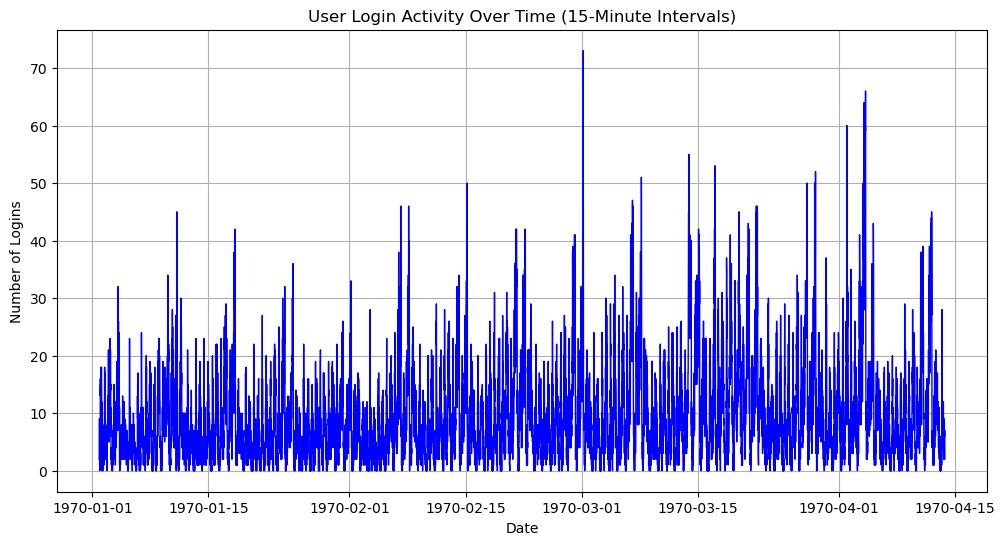

In [10]:
# Code task 16#
# Plot the login activity over time
plt.figure(figsize=(12, 6))
plt.plot(logins_15min, color="blue", linewidth=1)
plt.xlabel("Date")
plt.ylabel("Number of Logins")
plt.title("User Login Activity Over Time (15-Minute Intervals)")
plt.grid(True)
plt.show()

- Periodic Spikes: The login activity shows clear peaks and valleys, indicating cyclical user behavior.
- Daily Trends: There are consistent increases and decreases in logins, suggesting daily usage patterns.
- Potential Seasonality: Repeating patterns hint at possible weekly or weekend effects, which can be analyzed further.

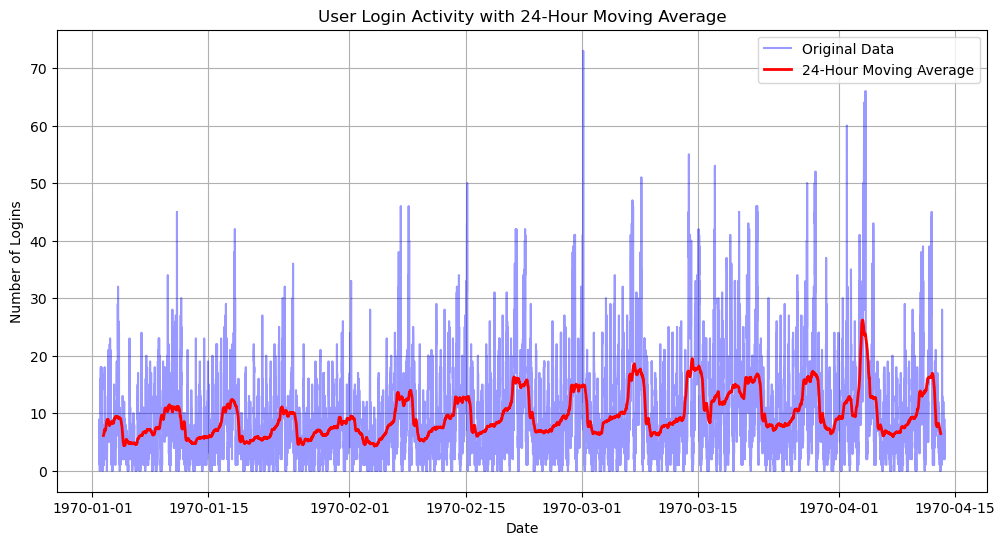

In [11]:
# Code task 18#
# Compute a rolling moving average with a 1-day (24-hour) window
logins_rolling_avg = logins_15min.rolling(window=96, center=True).mean()  # 96 intervals in 24 hours

# Plot the original data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(logins_15min, alpha=0.4, label="Original Data", color="blue")
plt.plot(logins_rolling_avg, label="24-Hour Moving Average", color="red", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Number of Logins")
plt.title("User Login Activity with 24-Hour Moving Average")
plt.legend()
plt.grid(True)
plt.show()

- Smoothed Trends: The red line (24-hour moving average) smooths out fluctuations, highlighting long-term trends in user activity.
- Daily Cycles: There is a clear repeating pattern in login activity, confirming daily cycles.
- Peak and Low Activity Periods: The peaks and dips suggest high user engagement at certain times of the day.

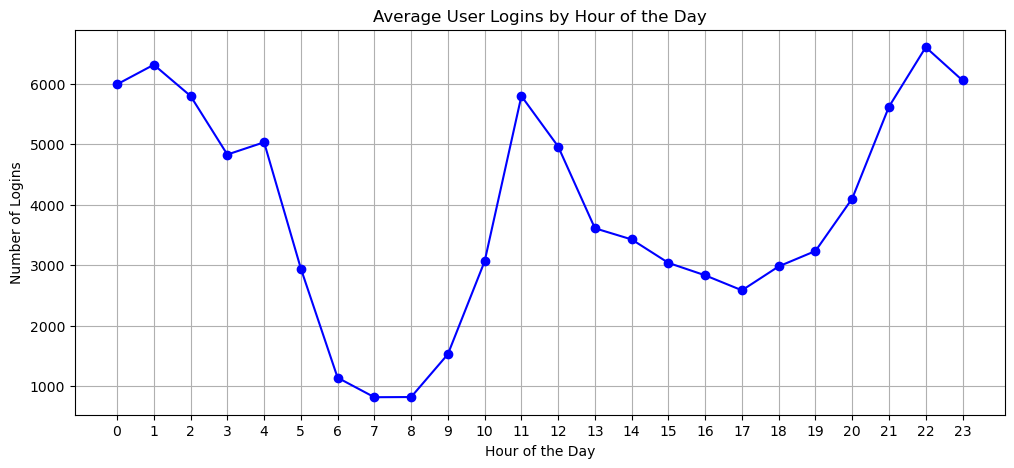

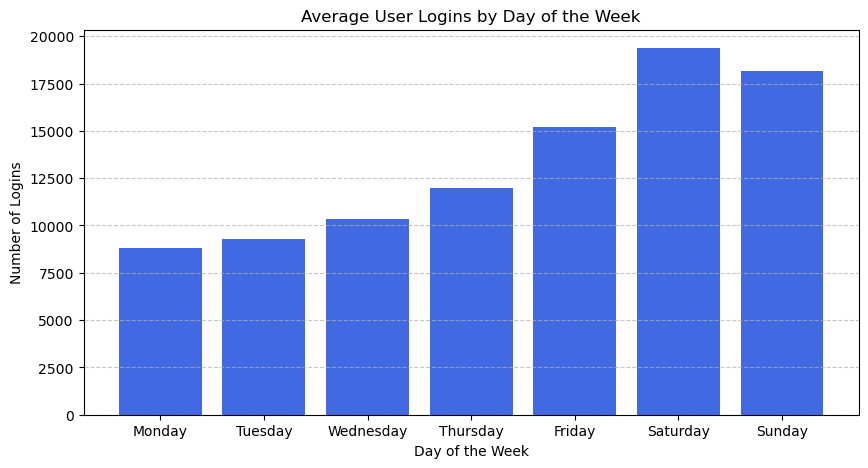

In [12]:
# Code task 19#
# Extract hour and day of the week for deeper analysis
logins_df["hour"] = logins_df.index.hour
logins_df["day_of_week"] = logins_df.index.dayofweek  # Monday=0, Sunday=6

# Code task 20#
# Aggregate logins by hour of the day
logins_by_hour = logins_df.groupby("hour").size()

# Code task 21#
# Aggregate logins by day of the week
logins_by_day = logins_df.groupby("day_of_week").size()

# Plot login activity by hour of the day
plt.figure(figsize=(12, 5))
plt.plot(logins_by_hour, marker="o", linestyle="-", color="blue")
plt.xticks(range(0, 24))
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Logins")
plt.title("Average User Logins by Hour of the Day")
plt.grid(True)
plt.show()

# Plot login activity by day of the week
plt.figure(figsize=(10, 5))
plt.bar(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
        logins_by_day, color="royalblue")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Logins")
plt.title("Average User Logins by Day of the Week")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


##### Hourly Trends 
Logins increase in the morning and peak in the evening hours (around 8-10 PM).
Activity declines overnight, reaching its lowest point in the early morning (2-5 AM).
Daily Trends 

Logins are relatively steady throughout the week, with slightly higher activity on weekends.
This suggests weekend spikes in demand, possibly due to increased leisure activity.

### 4.2 Define Retained Users

In [13]:
# Code task 22#
# Define retention: Users active in the last 30 days (relative to the latest trip date in the dataset)
latest_date = ultimate_data["last_trip_date"].max()
retention_threshold = latest_date - pd.Timedelta(days=30)

# Code task 23#
# Create 'retained' column (1 = retained, 0 = not retained)
ultimate_data["retained"] = (ultimate_data["last_trip_date"] >= retention_threshold).astype(int)

# Code task 24
# Calculate overall retention rate
retention_rate = ultimate_data["retained"].mean()

# Code task 25#
# Display retention rate and a preview of updated dataset
retention_rate

0.37608

In [14]:
# Code task 26#
# Check on the dataset after modification
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


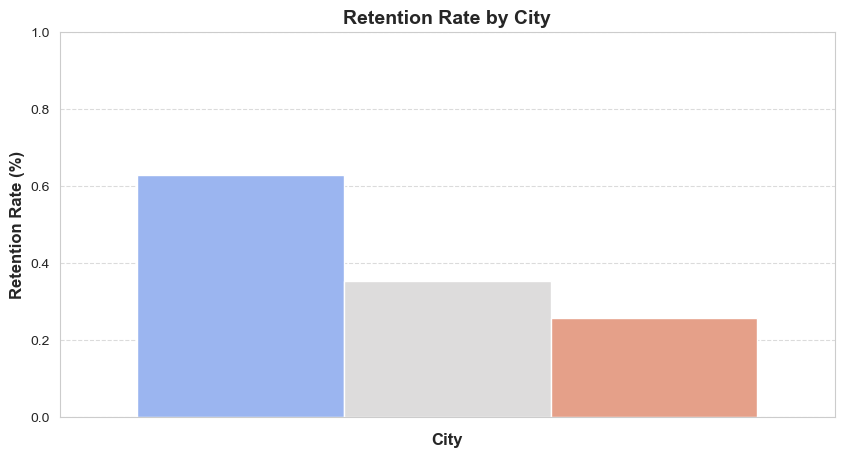

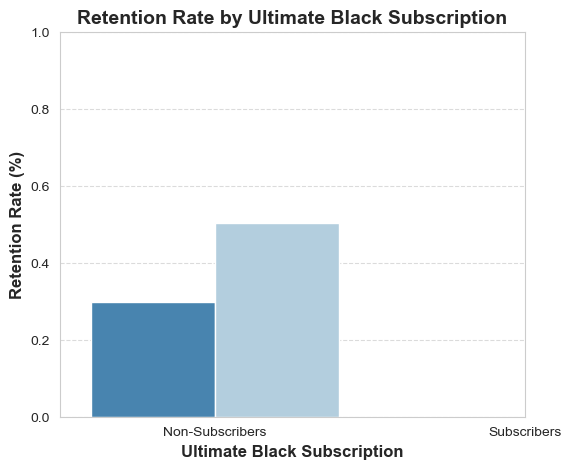

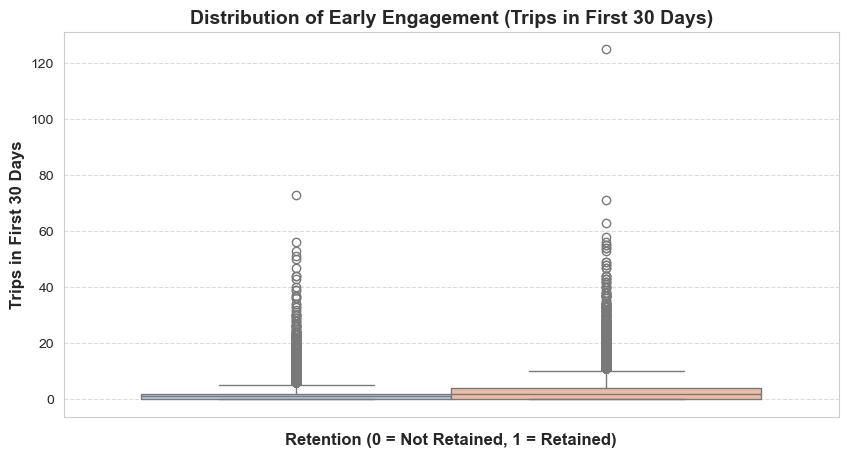

In [15]:
# Set visualization style
sns.set_style("whitegrid")

# Code task 27#
# Plot retention by city
plt.figure(figsize=(10, 5))
city_retention = ultimate_data.groupby("city")["retained"].mean().sort_values(ascending=False)
sns.barplot(hue=city_retention.index, y=city_retention.values, palette="coolwarm", legend=False)
plt.xlabel("City", fontsize=12, fontweight="bold")
plt.ylabel("Retention Rate (%)", fontsize=12, fontweight="bold")
plt.title("Retention Rate by City", fontsize=14, fontweight="bold")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Code task 28#
# Plot retention by Ultimate Black subscription
plt.figure(figsize=(6, 5))
black_user_retention = ultimate_data.groupby("ultimate_black_user")["retained"].mean()
sns.barplot(hue=black_user_retention.index, y=black_user_retention.values, palette="Blues_r", legend=False)
plt.xlabel("Ultimate Black Subscription", fontsize=12, fontweight="bold")
plt.ylabel("Retention Rate (%)", fontsize=12, fontweight="bold")
plt.title("Retention Rate by Ultimate Black Subscription", fontsize=14, fontweight="bold")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks([0, 1], ["Non-Subscribers", "Subscribers"])
plt.show()

# Code task 29#
# Plot retention by trips in first 30 days
plt.figure(figsize=(10, 5))
sns.boxplot(hue=ultimate_data["retained"], y=ultimate_data["trips_in_first_30_days"], palette="coolwarm", legend =False)
plt.xlabel("Retention (0 = Not Retained, 1 = Retained)", fontsize=12, fontweight="bold")
plt.ylabel("Trips in First 30 Days", fontsize=12, fontweight="bold")
plt.title("Distribution of Early Engagement (Trips in First 30 Days)", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 4.3 Correlation Analysis

In [16]:
# Code task 30#
# Make a copy of the ultimate_data
ultimate_df_encoded = ultimate_data.copy()

# Code task 31#
# Encode 'city' as dummy variables
ultimate_df_encoded = pd.get_dummies(ultimate_df_encoded, columns=["city"], drop_first=True)

# Code task 32#
# Convert boolean column 'ultimate_black_user' to integer (1 = Yes, 0 = No)
ultimate_df_encoded["ultimate_black_user"] = ultimate_df_encoded["ultimate_black_user"].astype(int)

# Code task 33#
# Select only numerical columns for correlation analysis
numeric_columns = ultimate_df_encoded.select_dtypes(include=[np.number])

# Code task 34#
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Code task 35#
# Extract correlations with the 'retained' column
correlation_with_retention = correlation_matrix["retained"].sort_values(ascending=False)

# Code task 36#
# Display the correlations
print(correlation_with_retention)

retained                  1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: retained, dtype: float64


END